In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = df.drop('Name', axis = 1)

In [5]:
df = df.drop('Ticket', axis = 1)

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Embarked'] = df['Embarked'].fillna('X')

In [8]:
df[df['Cabin'].isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
5,6,0,3,male,NaN,0,0,8.4583,NaN,Q
7,8,0,3,male,2.0,3,1,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,male,25.0,0,0,7.0500,NaN,S
885,886,0,3,female,39.0,0,5,29.1250,NaN,Q
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S


In [9]:
df['Cabin'] = df['Cabin'].fillna('X000')

In [10]:
df[df['Cabin'].str.contains(' ')]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
27,28,0,1,male,19.00,3,2,263.0000,C23 C25 C27,S
75,76,0,3,male,25.00,0,0,7.6500,F G73,S
88,89,1,1,female,23.00,3,2,263.0000,C23 C25 C27,S
97,98,1,1,male,23.00,0,1,63.3583,D10 D12,C
118,119,0,1,male,24.00,0,1,247.5208,B58 B60,C
128,129,1,3,female,NaN,1,1,22.3583,F E69,C
297,298,0,1,female,2.00,1,2,151.5500,C22 C26,S
299,300,1,1,female,50.00,0,1,247.5208,B58 B60,C
305,306,1,1,male,0.92,1,2,151.5500,C22 C26,S
311,312,1,1,female,18.00,2,2,262.3750,B57 B59 B63 B66,C


In [11]:
multi_cabin_rows = df['Cabin'].str.contains(' ', na=False)

In [12]:
df.loc[multi_cabin_rows, 'Cabin'] = df.loc[multi_cabin_rows, 'Cabin'].str.split()
df_exploded = df.explode('Cabin', ignore_index=True)

In [13]:
df_exploded.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,X000,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,X000,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,X000,S


In [14]:
single_letter_cabins = df_exploded[df_exploded['Cabin'].str.match(r'^[A-Za-z]$')]
print(single_letter_cabins)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
77            76         0       3    male  25.0      0      0   7.6500     F   
135          129         1       3  female   NaN      1      1  22.3583     F   
300          293         0       2    male  36.0      0      0  12.8750     D   
341          328         1       2  female  36.0      0      0  13.0000     D   
353          340         0       1    male  45.0      0      0  35.5000     T   
493          474         1       2  female  23.0      0      0  13.7917     D   
722          700         0       3    male  42.0      0      0   7.6500     F   
740          716         0       3    male  19.0      0      0   7.6500     F   

    Embarked  
77         S  
135        C  
300        C  
341        S  
353        S  
493        C  
722        S  
740        S  


In [15]:
df_exploded[['Deck', 'Number']] = df_exploded['Cabin'].str.extract(r'([A-Za-z])(\d+)')
print(df_exploded)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
0              1         0       3    male  22.0      1      0   7.2500  X000   
1              2         1       1  female  38.0      1      0  71.2833   C85   
2              3         1       3  female  26.0      0      0   7.9250  X000   
3              4         1       1  female  35.0      1      0  53.1000  C123   
4              5         0       3    male  35.0      0      0   8.0500  X000   
..           ...       ...     ...     ...   ...    ...    ...      ...   ...   
920          887         0       2    male  27.0      0      0  13.0000  X000   
921          888         1       1  female  19.0      0      0  30.0000   B42   
922          889         0       3  female   NaN      1      2  23.4500  X000   
923          890         1       1    male  26.0      0      0  30.0000  C148   
924          891         0       3    male  32.0      0      0   7.7500  X000   

    Embarked Deck Number  


In [16]:
df_exploded[df_exploded['Deck'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Number
77,76,0,3,male,25.0,0,0,7.6500,F,S,NaN,NaN
135,129,1,3,female,NaN,1,1,22.3583,F,C,NaN,NaN
300,293,0,2,male,36.0,0,0,12.8750,D,C,NaN,NaN
341,328,1,2,female,36.0,0,0,13.0000,D,S,NaN,NaN
353,340,0,1,male,45.0,0,0,35.5000,T,S,NaN,NaN
493,474,1,2,female,23.0,0,0,13.7917,D,C,NaN,NaN
722,700,0,3,male,42.0,0,0,7.6500,F,S,NaN,NaN
740,716,0,3,male,19.0,0,0,7.6500,F,S,NaN,NaN


In [17]:
single_letter_cabins = df_exploded[df_exploded['Cabin'].str.match(r'^[A-Za-z]000$')]
print(single_letter_cabins)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
0              1         0       3    male  22.0      1      0   7.2500  X000   
2              3         1       3  female  26.0      0      0   7.9250  X000   
4              5         0       3    male  35.0      0      0   8.0500  X000   
5              6         0       3    male   NaN      0      0   8.4583  X000   
7              8         0       3    male   2.0      3      1  21.0750  X000   
..           ...       ...     ...     ...   ...    ...    ...      ...   ...   
918          885         0       3    male  25.0      0      0   7.0500  X000   
919          886         0       3  female  39.0      0      5  29.1250  X000   
920          887         0       2    male  27.0      0      0  13.0000  X000   
922          889         0       3  female   NaN      1      2  23.4500  X000   
924          891         0       3    male  32.0      0      0   7.7500  X000   

    Embarked Deck Number  


In [18]:
df_exploded.loc[single_letter_cabins.index, 'Deck'] = single_letter_cabins['Cabin'].str[0]

In [19]:
single_letter_cabins = df_exploded[df_exploded['Cabin'].str.match(r'^[A-Za-z]$')]
print(single_letter_cabins[['Cabin', 'Deck']])

    Cabin Deck
77      F  NaN
135     F  NaN
300     D  NaN
341     D  NaN
353     T  NaN
493     D  NaN
722     F  NaN
740     F  NaN


In [20]:
df_exploded.loc[single_letter_cabins.index, 'Deck'] = single_letter_cabins['Cabin'].str[0]

In [21]:
remaining_nan_deck = df_exploded[df_exploded['Deck'].isnull()]
print(remaining_nan_deck[['Cabin', 'Deck']])

Empty DataFrame
Columns: [Cabin, Deck]
Index: []


In [22]:
df_exploded.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            178
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
Deck             0
Number           8
dtype: int64

In [23]:
df_exploded[df_exploded['Number'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Number
77,76,0,3,male,25.0,0,0,7.6500,F,S,F,NaN
135,129,1,3,female,NaN,1,1,22.3583,F,C,F,NaN
300,293,0,2,male,36.0,0,0,12.8750,D,C,D,NaN
341,328,1,2,female,36.0,0,0,13.0000,D,S,D,NaN
353,340,0,1,male,45.0,0,0,35.5000,T,S,T,NaN
493,474,1,2,female,23.0,0,0,13.7917,D,C,D,NaN
722,700,0,3,male,42.0,0,0,7.6500,F,S,F,NaN
740,716,0,3,male,19.0,0,0,7.6500,F,S,F,NaN


In [24]:
df_exploded['Number'] = pd.to_numeric(df_exploded['Number'], errors='coerce')

In [25]:
median_values = df_exploded.groupby('Deck')['Number'].median()

In [26]:
df_exploded['Number'] = df_exploded.apply(
    lambda row: median_values[row['Deck']] if pd.isnull(row['Number']) else row['Number'],
    axis=1)

In [27]:
remaining_nan_numbers = df_exploded[df_exploded['Number'].isnull()]
print(remaining_nan_numbers[['Cabin', 'Deck', 'Number']])

    Cabin Deck  Number
353     T    T     NaN


In [28]:
df_exploded['Number'] = df_exploded['Number'].fillna(0)

In [29]:
df_exploded.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            178
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
Deck             0
Number           0
dtype: int64

In [30]:
df_exploded[df_exploded['Age'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Number
5,6,0,3,male,NaN,0,0,8.4583,X000,Q,X,0.0
17,18,1,2,male,NaN,0,0,13.0000,X000,S,X,0.0
19,20,1,3,female,NaN,0,0,7.2250,X000,C,X,0.0
26,27,0,3,male,NaN,0,0,7.2250,X000,C,X,0.0
30,29,1,3,female,NaN,0,0,7.8792,X000,Q,X,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
891,860,0,3,male,NaN,0,0,7.2292,X000,C,X,0.0
895,864,0,3,female,NaN,8,2,69.5500,X000,S,X,0.0
900,869,0,3,male,NaN,0,0,9.5000,X000,S,X,0.0
912,879,0,3,male,NaN,0,0,7.8958,X000,S,X,0.0


In [31]:
age_medians = df_exploded.groupby('Pclass')['Age'].median()

In [32]:
df_exploded['Age'] = df_exploded.apply(lambda row: age_medians[row['Pclass']] if pd.isna(row['Age']) else row['Age'], axis=1)

In [33]:
df_exploded.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Deck           0
Number         0
dtype: int64

In [34]:
df_exploded = pd.get_dummies(df_exploded, columns=['Sex', 'Embarked', 'Deck'])


In [35]:
df_exploded.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Number,Sex_female,...,Embarked_X,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_X
0,1,0,3,22.0,1,0,7.2500,X000,0.0,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,38.0,1,0,71.2833,C85,85.0,True,...,False,False,False,True,False,False,False,False,False,False
2,3,1,3,26.0,0,0,7.9250,X000,0.0,True,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,C123,123.0,True,...,False,False,False,True,False,False,False,False,False,False
4,5,0,3,35.0,0,0,8.0500,X000,0.0,False,...,False,False,False,False,False,False,False,False,False,True


In [36]:
df_exploded.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Number         float64
Sex_female        bool
Sex_male          bool
Embarked_C        bool
Embarked_Q        bool
Embarked_S        bool
Embarked_X        bool
Deck_A            bool
Deck_B            bool
Deck_C            bool
Deck_D            bool
Deck_E            bool
Deck_F            bool
Deck_G            bool
Deck_T            bool
Deck_X            bool
dtype: object

In [37]:
df_exploded=df_exploded.drop('Cabin', axis=1)

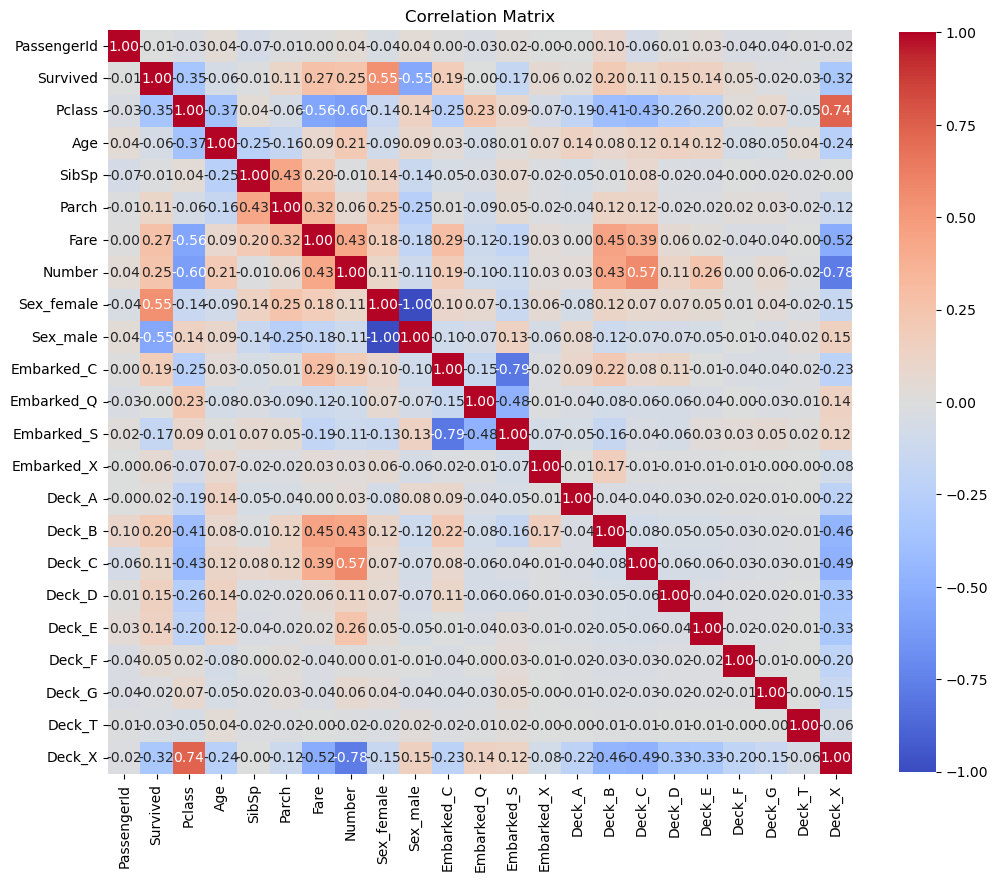

In [38]:
correlation_matrix=df_exploded.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [39]:
df_exploded['age_group'] = pd.cut(df_exploded['Age'], 
                                   bins=[0, 18, 30, 45, 60, 100], 
                                   labels=['0-18', '19-30', '31-45', '46-60', '61+'])

In [40]:
df_exploded.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Number,Sex_female,Sex_male,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_X,age_group
0,1,0,3,22.0,1,0,7.2500,0.0,False,True,...,False,False,False,False,False,False,False,False,True,19-30
1,2,1,1,38.0,1,0,71.2833,85.0,True,False,...,False,False,True,False,False,False,False,False,False,31-45
2,3,1,3,26.0,0,0,7.9250,0.0,True,False,...,False,False,False,False,False,False,False,False,True,19-30
3,4,1,1,35.0,1,0,53.1000,123.0,True,False,...,False,False,True,False,False,False,False,False,False,31-45
4,5,0,3,35.0,0,0,8.0500,0.0,False,True,...,False,False,False,False,False,False,False,False,True,31-45


In [41]:
df_exploded = pd.get_dummies(df_exploded, columns=['age_group'])

In [42]:
df_exploded[['Embarked_C', 'Embarked_Q','Embarked_S','Embarked_X', 'Sex_female', 'Sex_male', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_X', 'age_group_0-18','age_group_19-30', 'age_group_31-45', 'age_group_46-60', 'age_group_61+']] = df_exploded[['Embarked_C', 'Embarked_Q','Embarked_S','Embarked_X', 'Sex_female', 'Sex_male', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_X', 'age_group_0-18','age_group_19-30', 'age_group_31-45', 'age_group_46-60', 'age_group_61+']].astype(int)


In [43]:
df_exploded.dtypes

PassengerId          int64
Survived             int64
Pclass               int64
Age                float64
SibSp                int64
Parch                int64
Fare               float64
Number             float64
Sex_female           int32
Sex_male             int32
Embarked_C           int32
Embarked_Q           int32
Embarked_S           int32
Embarked_X           int32
Deck_A               int32
Deck_B               int32
Deck_C               int32
Deck_D               int32
Deck_E               int32
Deck_F               int32
Deck_G               int32
Deck_T               int32
Deck_X               int32
age_group_0-18       int32
age_group_19-30      int32
age_group_31-45      int32
age_group_46-60      int32
age_group_61+        int32
dtype: object

In [44]:
corr_matrix = df_exploded.corr().abs() 

threshold = 0.8

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

correlated_pairs = [(column, row) for column in upper_tri.columns for row in upper_tri.index if upper_tri.loc[row, column] > threshold]

print("Pairs of highly correlated features:")
for pair in correlated_pairs:
    print(pair)

Pairs of highly correlated features:
('Sex_male', 'Sex_female')


In [45]:
df_exploded = df_exploded.drop(columns=['PassengerId'], axis=1)

In [46]:
y = df_exploded['Survived']
x = df_exploded.drop(columns=['Survived'])

In [47]:
x.drop(columns=['Embarked_Q','SibSp'])

,Pclass,Age,Parch,Fare,Number,Sex_female,Sex_male,Embarked_C,Embarked_S,Embarked_X,...,Deck_E,Deck_F,Deck_G,Deck_T,Deck_X,age_group_0-18,age_group_19-30,age_group_31-45,age_group_46-60,age_group_61+
0,3,22.0,0,7.2500,0.0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
1,1,38.0,0,71.2833,85.0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,26.0,0,7.9250,0.0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,1,35.0,0,53.1000,123.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,3,35.0,0,8.0500,0.0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,2,27.0,0,13.0000,0.0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
921,1,19.0,0,30.0000,42.0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
922,3,24.0,2,23.4500,0.0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
923,1,26.0,0,30.0000,148.0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
x = (x - x.mean()) / x.std()

In [49]:
x = np.hstack((x, np.ones((x.shape[0], 1))))

In [50]:
ratio = 0.80
total_rows = x.shape[0]
train_size = int(total_rows*ratio)
x_train = x[0:train_size]
x_test = x[train_size:]
y_train = y[0:train_size]
y_test = y[train_size:]

In [51]:
def hinge_loss_gradient(X, y, weights, C):
    m = len(X)
    distances = 1 - y * np.dot(X, weights)
    gradient = np.zeros(weights.shape)

    for i, d in enumerate(distances):
        if d > 0:
            gradient -= y[i] * X[i]

    gradient = weights + (C / m) * gradient
    return gradient
def train_svm(X, y, learning_rate, num_iterations, C):
    y = np.where(y == 0, -1, y)  # Convert 0 to -1 for SVM
    weights = np.zeros(X.shape[1])
    loss_history = []

    for i in range(num_iterations):
        gradient = hinge_loss_gradient(X, y, weights, C)
        weights -= learning_rate * gradient

        # Calculate hinge loss
        distances = 1 - y * np.dot(X, weights)
        loss = 0.5 * np.dot(weights, weights) + (C / len(X)) * np.sum(np.maximum(0, distances))
        loss_history.append(loss)

        if i % 1000 == 0:
            print(f"Iteration {i}, Loss: {loss}")

    return weights, loss_history

def predict_svm(X, weights):
    predictions = np.dot(X, weights)
    return (predictions > 0).astype(int)

C = 1.0
learning_rate = 0.001
num_iterations = 1500

weights, loss_history = train_svm(x_train, y_train, learning_rate, num_iterations, C)

Iteration 0, Loss: 0.9989240010073981
Iteration 1000, Loss: 0.6629647962509366


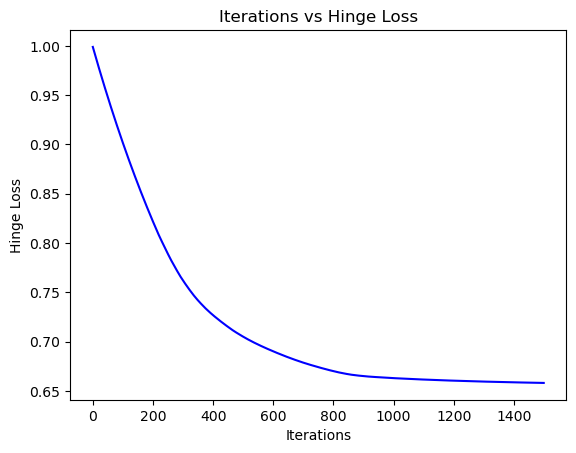

In [52]:
plt.plot(range(num_iterations), loss_history, 'b-')
plt.xlabel("Iterations")
plt.ylabel("Hinge Loss")
plt.title("Iterations vs Hinge Loss")
plt.show()

In [53]:
train_predictions = predict_svm(x_train, weights)
test_predictions = predict_svm(x_test, weights)

train_accuracy = np.mean(train_predictions == y_train) * 100
test_accuracy = np.mean(test_predictions == y_test) * 100

print(f"Training Accuracy: {train_accuracy}%")
print(f"Test Accuracy: {test_accuracy}%")

Training Accuracy: 79.1891891891892%
Test Accuracy: 82.16216216216216%


In [54]:
def f1_score(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    
    tp = np.sum((y_true == 1) & (y_pred == 1))  
    fp = np.sum((y_true == 0) & (y_pred == 1))  
    fn = np.sum((y_true == 1) & (y_pred == 0))  

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1,precision,recall

f1 = f1_score(y_test, test_predictions)
print("F1 Score, Precision, Recall:", f1)

F1 Score, Precision, Recall: (0.762589928057554, 0.7464788732394366, 0.7794117647058824)
